# 机器学习算法

## 决策树

### 信息熵

In [1]:
import math
def calc_info_entropy(p_list):
    entropy = -sum([x * math.log(x, 2) for x in p_list])
    return entropy

In [4]:
a = 3/4
p = [a, 1-a]
calc_info_entropy(p)

0.8112781244591328

In [5]:
_*4/9*2

0.7211361106303403

In [6]:
0.764-0.7211361106303403

0.04286388936965968

## 线性回归

### 单变量线性回归

### 多变量线性回归

## 逻辑回归

## 神经网络

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz as gz
import random

### 网络结构

In [8]:
def draw_neural_graph(input=2, hide=(2, 3), output=3, 
                      in_label='in', hidden_label='hi', out_label='out', 
                      size='10,10', dropout=False,
                      display="v", fixed=True ):
    """
    绘制神经网络结构图（有向图）
    :param in:         输入层神经元数量
    :param hide:       隐藏层神经元数量（可迭代数组）
    :param out:        输出层神经元数量
    :param inp_label:  输入层名称
    :param hide_label: 隐藏层名称
    :param outp_label: 输出层名称
    :param size:       图像显示大小
    :param dropout:    是否全连接
    :param display:    水平或垂直显示，可选项为 'h', 'v'
    :param fixed:      边固定或浮动 
    :return:           有向图
    """
    dot = gz.Digraph(name='neural network')
    dot.attr(penwidth='0',splines='line',size=size,nodesep='0.8')
    dot.attr('node', shape='circle', style='filled',fixedsize='true')
    ########################################################################################
    def add_subgraph(name="layer", label="layer", layer_name="layer name", num = 2, color="cadetblue1"):
        with dot.subgraph(name=name) as sg:
            sg.attr(label=label)
            sg.node_attr.update(fillcolor=color)
            for i in range(num):
                layer_node  = '%s-%s' % (layer_name, i+1)
                sg.node(layer_node)
        
    def add_edge(layer_1, layer_2, label_1, label_2):
        for i in range(layer_1):
            layer_1_node  = '%s-%s' % (label_1, i+1)
            for j in range(layer_2):
                layer_2_node  = '%s-%s' % (label_2, j+1)
                if i == j:
                    if dropout:
                        if random.randint(0, max(layer_1, layer_2)):
                            dot.edge(layer_1_node, layer_2_node, constraint='true')
                    else:
                        dot.edge(layer_1_node, layer_2_node, constraint='true')
                else:
                    if dropout:
                        if random.randint(0, max(layer_1, layer_2)):
                            dot.edge(layer_1_node, layer_2_node, constraint='true')
                    else:
                        dot.edge(layer_1_node, layer_2_node, constraint='false')
    #########################################################################################
    # number of neurons corresponding to of the layer
    num_layer_list = list(hide)
    num_layer_list.insert(0, input)
    num_layer_list.append(output)
    len_nll = len(num_layer_list)
    # 当前层和下一层配对 (2,2,1)
    # 0:2->2, 1:2->1
    
    if display == 'v':
        dot.attr(rankdir='LR')
        # subgraph(layer) add node
        for index, num in enumerate(num_layer_list):
            name = "cluster_" + str(index)
            if index == 0: # 输入层            
                label = "input layer"
                layer_name = in_label
                color = "darkseagreen1"
                add_subgraph(name, label, layer_name, num, color)
            elif index == len_nll-1: # 输出层
                label = "output layer"
                layer_name = out_label
                color = "cadetblue1"
                add_subgraph(name, label, layer_name, num, color)
            else:
                label = "hidden layer"
                layer_name = hidden_label + str(index)
                color = "lightgrey"
                add_subgraph(name, label, layer_name,num, color)
                       
    # add edge
    for index, (i, j) in enumerate(zip(num_layer_list[:-1], num_layer_list[1:])):
        if index == 0: # 输入层 
            add_edge(i, j, in_label, hidden_label+str(index+1))
        elif index == len(num_layer_list) - 2: # 输出层
            add_edge(i, j, hidden_label+str(index), out_label)
        else: # 隐藏层
            add_edge(i, j, hidden_label+str(index), hidden_label+str(index+1))
#     print(dot.source)
    return dot

    # 其他运行方式
    # return dot.view()

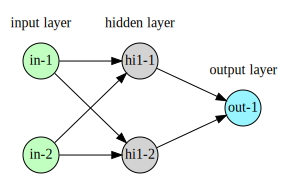

In [25]:
dot = draw_neural_graph(2, (2,), 1, display="v", dropout=True)
# print(dot.source)
dot

### 激活函数

In [26]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [27]:
active = sigmoid

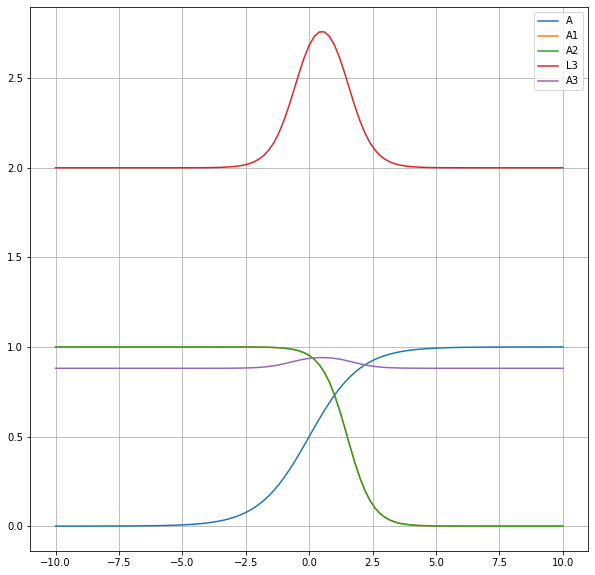

In [28]:
fig = plt.figure(figsize=(10, 10))

x = np.linspace(-10, 10, 101)
y = active(x)
plt.plot(x, y, label="A")

y1 = -2 * x + 3
# plt.plot(x, y1, label="L1")
a1 = sigmoid(y1)
plt.plot(x, a1, label="A1")

y2 = 2 * x + 1
# plt.plot(x, y2, label="L2")
a2 = sigmoid(y2)
plt.plot(x, a1, label="A2")

y3 = a1 + a2 + 1
plt.plot(x, y3, label="L3")
a3 = sigmoid(y3)
plt.plot(x, a3, label="A3")

# plt.xlim(1, -1)
# plt.ylim(1, -1)
plt.grid()
plt.legend()
plt.show()

### 近似理论-函数拟合

b: -399.6
b: -599.4
b: -699.3
b: -899.1


<ipython-input-393-2acd6fe4eb5a>:2: RuntimeWarning: overflow encountered in exp
  y = 1 / (1 + np.exp(-x))


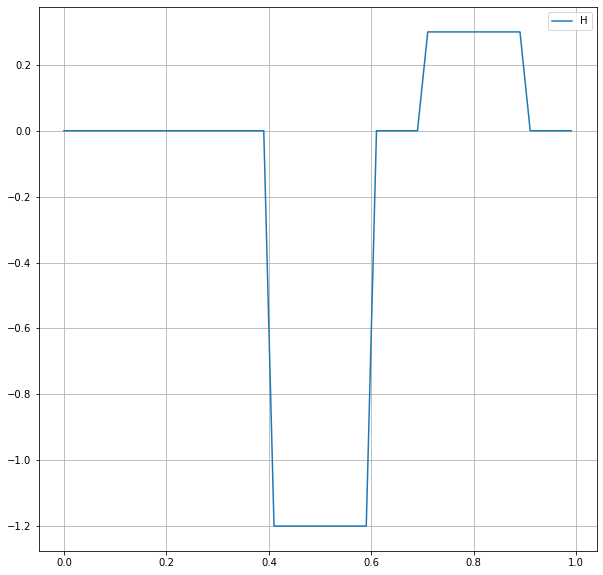

In [412]:
# http://neuralnetworksanddeeplearning.com/chap4.html
fig = plt.figure(figsize=(10, 10))

x = np.arange(0, 1, 0.01)

w = 999
# s = -b/w

# y1
s1 = 0.40
s = s1
b = -s*w
print("b:", b)
y1 = w*x + b
a1 = sigmoid(y1)
# plt.plot(x, a1, label="A1")

# y2
s2 = 0.60
s = s2
b = -s*w
print("b:", b)
y2 = w*x + b
a2 = sigmoid(y2)
# plt.plot(x, a2, label="A2")

h = 1.2
h1 = h * a1 - h * a2
# plt.plot(x, h1, label="H1")

# y3
s3 = 0.7
s = s3
b = -s*w
print("b:", b)
y3 = w*x + b
a3 = sigmoid(y3)
# plt.plot(x, s1, label="A3")

# y4
s4 = 0.9
s = s4
b = -s*w
print("b:", b)
y4 = w*x + b
a4 = sigmoid(y4)
# plt.plot(x, s2, label="A4")

h = 0.3
h2 = h * a3 - h * a4
# plt.plot(x, h2, label="H2")

h1 = -1.2
h2 = 0.3
sh = (h1 * a1 - h1 * a2) + (h2 * a3 - h2 * a4)
plt.plot(x, sh, label="H")

plt.grid()
plt.legend()
plt.show()

### 线性变换

In [33]:
import numpy as np
import matplotlib.pyplot as plt

[[1]
 [4]]


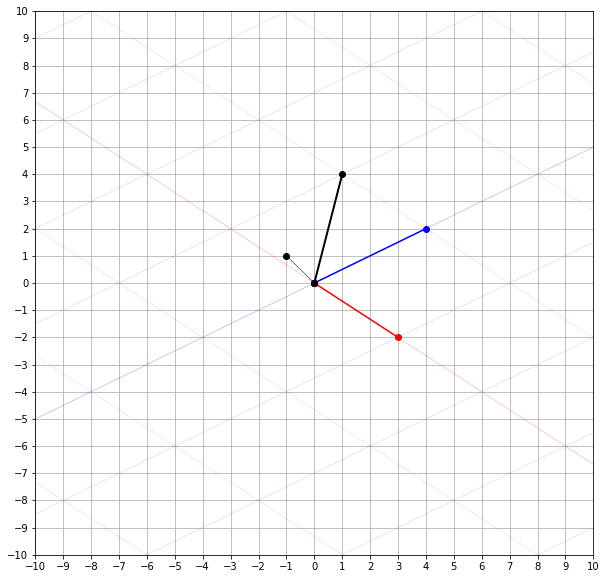

In [34]:
# http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/
fig = plt.figure(figsize=(10,10))

min = -10
max = 10
step = 1

plt.xlim(min, max)
plt.ylim(min, max)
xticks = np.arange(min, max+1, step)
yticks = np.arange(min, max+1, step)
plt.xticks(xticks)
plt.yticks(yticks)

# 新的坐标系
m = np.array([[3, 4], [-2, 2]])

# 画出新的坐标系
base_x = m[:, 0]
base_y = m[:, 1]
plt.plot([0, base_x[0]], [0, base_x[1]], c='red', marker='o')
plt.plot([0, base_y[0]], [0, base_y[1]], c='blue', marker='o')

base_x_x = []
base_x_y = []
for x in np.arange(min, max+1, step):
    base_x_x.append(x*base_x[0])
    base_x_y.append(x*base_x[1])
plt.plot(base_x_x, base_x_y, '-', c='red', lw=0.1)

base_y_x = []
base_y_y = []
for x in np.arange(min, max+1, step):
    base_y_x.append(x*base_y[0])
    base_y_y.append(x*base_y[1])
plt.plot(base_y_x, base_y_y, '-', c='blue', lw=0.1)


# X轴平移N个单位
for x in np.arange(min, max+1, step):
    new_x_x = []
    new_x_y = []
    for i in np.arange(len(base_x_y)):
        new_x_x.append(base_x_x[i] + x*base_y[0])
        new_x_y.append(base_x_y[i] + x*base_y[1])
    plt.plot(new_x_x, new_x_y, '-', c='red', lw=0.1)
    
# Y轴平移N个单位
for x in np.arange(min, max+1, step):
    new_y_x = []
    new_y_y = []
    for i in range(len(base_y_x)):
        new_y_x.append(base_y_x[i] + x*base_x[0])
        new_y_y.append(base_y_y[i] + x*base_x[1])
    plt.plot(new_y_x, new_y_y, '-', c='blue', lw=0.1)
       
    
v = np.array([[-1], [1]])
nv = np.dot(m, v)
print(nv)
# 画向量
origin = np.zeros((2, 1))
v = np.hstack((origin, v))
plt.plot(*v, c="black", marker='o', lw=0.5)
nv = np.hstack((origin, nv))
plt.plot(*nv, c="black", marker='o', lw=2)

plt.grid()

### 非线性变换

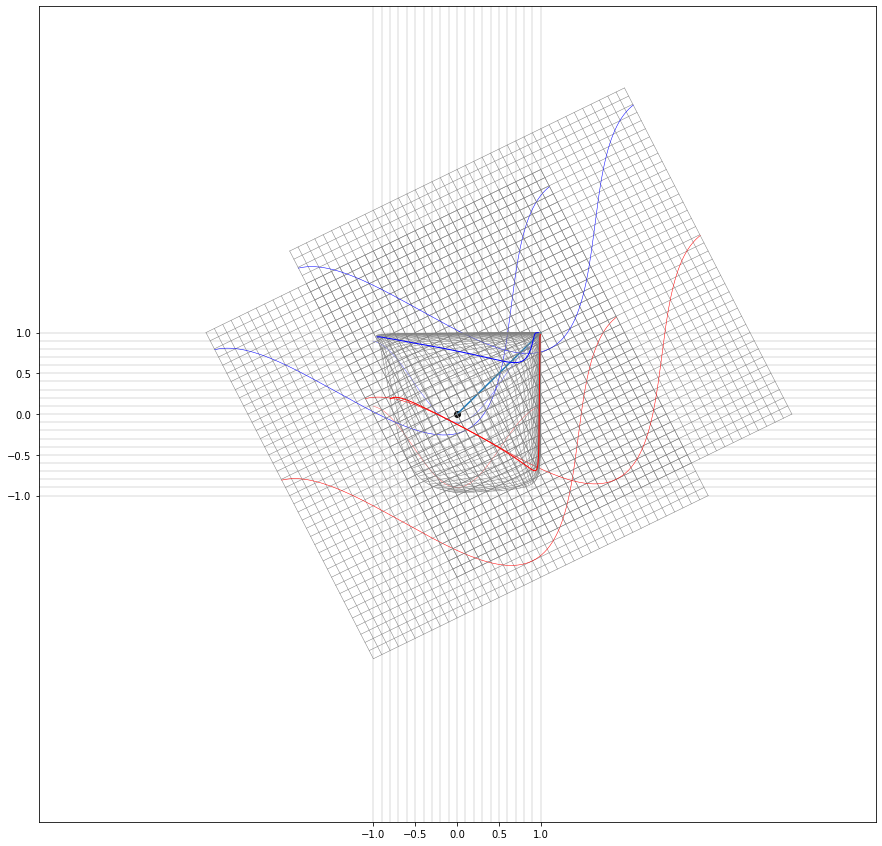

In [39]:
fig = plt.figure(figsize=(15, 15))

r = 5
plt.xlim(-r, r)
plt.ylim(-r, r)
xticks = np.arange(-1, 1.1, 0.5)
yticks = np.arange(-1, 1.1, 0.5)
plt.xticks(xticks)
plt.yticks(yticks)

# data
step = 0.01
x = np.arange(-1, 1+step, step)

y1 = -1/2 * np.cos(3*x) + 0.4
y2 = y1 - 0.8

plt.scatter(0, 0, c="black")
plt.plot(x, y1, c="blue", lw=0.3)
plt.plot(x, y2, c="red", lw=0.3)

for xx in np.arange(-1, 1.1, 0.1):
    plt.axvline(x=xx, c="gray", lw=0.3) #添加垂直直线
for yy in np.arange(-1, 1.1, 0.1):
    plt.axhline(y=yy, c="gray", lw=0.3) #添加水平直线

# 根据规则辨别，而非数值
# 代数和几何
# 几何是低维的代数，代数是高维的几何

# 新的坐标系
w = np.array([[2, -1], [1, 2]])
b = np.array([[1], [1]]) 
# 基坐标
# base_x = m[:, 0]
# base_y = m[:, 1]

# base_x = np.dot(m, [x, [0] * len(x)])
# base_y = np.dot(m, [[0] * len(x), x])
# plt.plot(*base_x)
# plt.plot(*base_y)

step = 0.05
rr = np.arange(-1, 1+step, step)
color = "gray"

# X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)])
    plt.plot(*new_x,  c=color, lw=0.5)

# Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr])
    plt.plot(*new_y, c=color, lw=0.5)

# blue
new_blue = np.dot(w, [x, y1])
plt.plot(*new_blue,  c="blue", lw=0.5)

# red
new_red = np.dot(w, [x, y2])
plt.plot(*new_red, c="red", lw=0.5)

b = np.array([[1], [1]])    
origin = np.array([[0], [0]])
plt.plot(*np.hstack((origin, b)))

# new X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
    plt.plot(*new_x,  c=color, lw=0.5)

# new Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr]) + b
    plt.plot(*new_y, c=color, lw=0.5)

# blue
new_blue = new_blue + b
plt.plot(*new_blue,  c="blue", lw=0.5)

# red
new_red = new_red + b
plt.plot(*new_red, c="red", lw=0.5)


step = 0.05
rr = np.arange(-1, 1+step, step)

# Activation  X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
    act_x = np.tanh(new_x)
    plt.plot(*act_x,  c=color, lw=0.5)

# Activation Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr]) + b
    act_y = np.tanh(new_y)
    plt.plot(*act_y, c=color, lw=0.5)

# blue
act_blue = np.tanh(new_blue)
plt.plot(*act_blue,  c="blue", lw=1)

# red
act_red = np.tanh(new_red)
plt.plot(*act_red, c="red", lw=1)
plt.show()

plt.show()

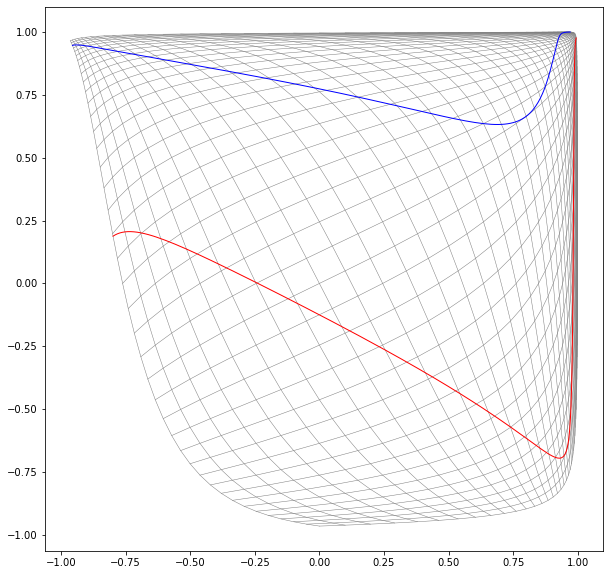

In [40]:
fig = plt.figure(figsize=(10,10))
step = 0.05
rr = np.arange(-1, 1+step, step)

# Activation  X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
    act_x = np.tanh(new_x)
    plt.plot(*act_x,  c=color, lw=0.5)

# Activation Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr]) + b
    act_y = np.tanh(new_y)
    plt.plot(*act_y, c=color, lw=0.5)


# blue
act_blue = np.tanh(new_blue)
plt.plot(*act_blue,  c="blue", lw=1)

# red
act_red = np.tanh(new_red)
plt.plot(*act_red, c="red", lw=1)
plt.show()

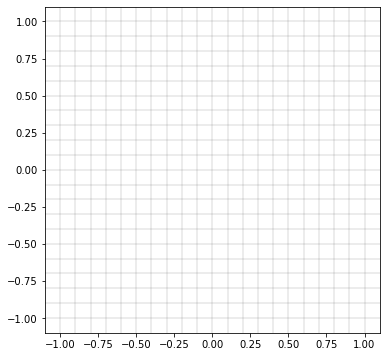

In [41]:
fig = plt.figure(figsize=(6, 6))
step = 0.01
x = np.arange(-1, 1+step, step)

for xx in np.arange(-1, 1.1, 0.1):
    plt.axvline(x=xx, c="gray", lw=0.3) #添加垂直直线
for yy in np.arange(-1, 1.1, 0.1):
    plt.axhline(y=yy, c="gray", lw=0.3) #添加水平直线

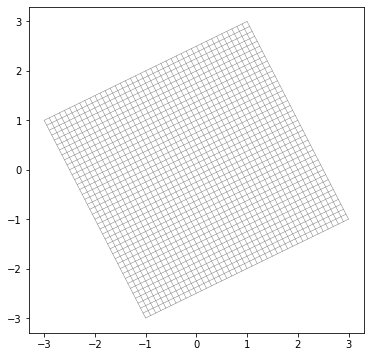

In [42]:
fig = plt.figure(figsize=(6, 6))
# 新的坐标系
w = np.array([[2, -1], [1, 2]])
# 基坐标
# base_x = m[:, 0]
# base_y = m[:, 1]

# base_x = np.dot(m, [x, [0] * len(x)])
# base_y = np.dot(m, [[0] * len(x), x])
# plt.plot(*base_x)
# plt.plot(*base_y)

step = 0.05
rr = np.arange(-1, 1+step, step)
color = "gray"
# X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)])
    plt.plot(*new_x,  c=color, lw=0.5)

# Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr])
    plt.plot(*new_y, c=color, lw=0.5)

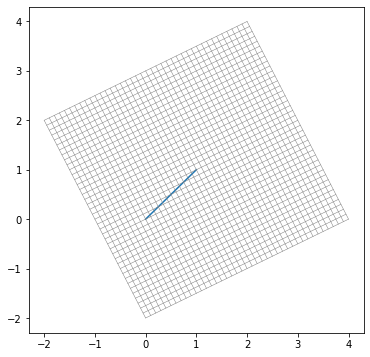

In [43]:
# 坐标系平移
fig = plt.figure(figsize=(6, 6))
b = np.array([[1], [1]])    
origin = np.array([[0], [0]])
plt.plot(*np.hstack((origin, b)))

# new X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
    plt.plot(*new_x,  c=color, lw=0.5)

# new Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr]) + b
    plt.plot(*new_y, c=color, lw=0.5)

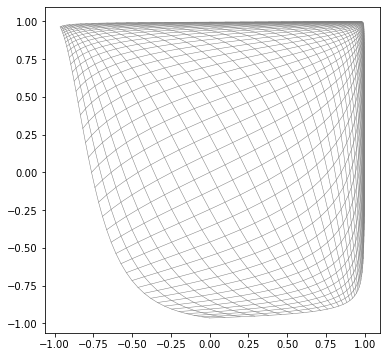

In [44]:
# 非线性变换
fig = plt.figure(figsize=(6, 6))
step = 0.05
rr = np.arange(-1, 1+step, step)

# Activation  X
for yy in rr:
    new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
    act_x = np.tanh(new_x)
    plt.plot(*act_x,  c=color, lw=0.5)

# Activation Y
for xx in rr:
    new_y = np.dot(w, [[xx] * len(rr), rr]) + b
    act_y = np.tanh(new_y)
    plt.plot(*act_y, c=color, lw=0.5)


plt.show()

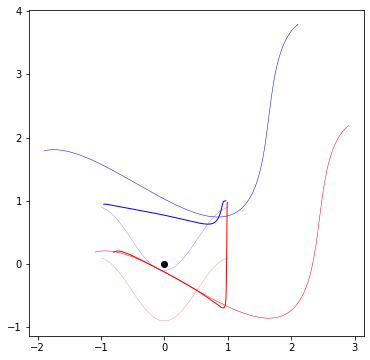

In [45]:
# data
step = 0.01
x = np.arange(-1, 1+step, step)
y1 = -1/2 * np.cos(3*x) + 0.4
y2 = y1 - 0.8

fig = plt.figure(figsize=(6, 6))

plt.scatter(0, 0, c="black")

plt.plot(x, y1, c="blue", lw=0.2)
plt.plot(x, y2, c="red", lw=0.2)

# blue_1
new_blue = np.dot(w, [x, y1]) + b
plt.plot(*new_blue,  c="blue", lw=0.5)

# red_1
new_red = np.dot(w, [x, y2]) + b
plt.plot(*new_red, c="red", lw=0.5)

# blue_2
act_blue = np.tanh(new_blue)
plt.plot(*act_blue,  c="blue", lw=1)

# red_2
act_red = np.tanh(new_red)
plt.plot(*act_red, c="red", lw=1)
plt.show()

### 动画展示

In [1]:
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


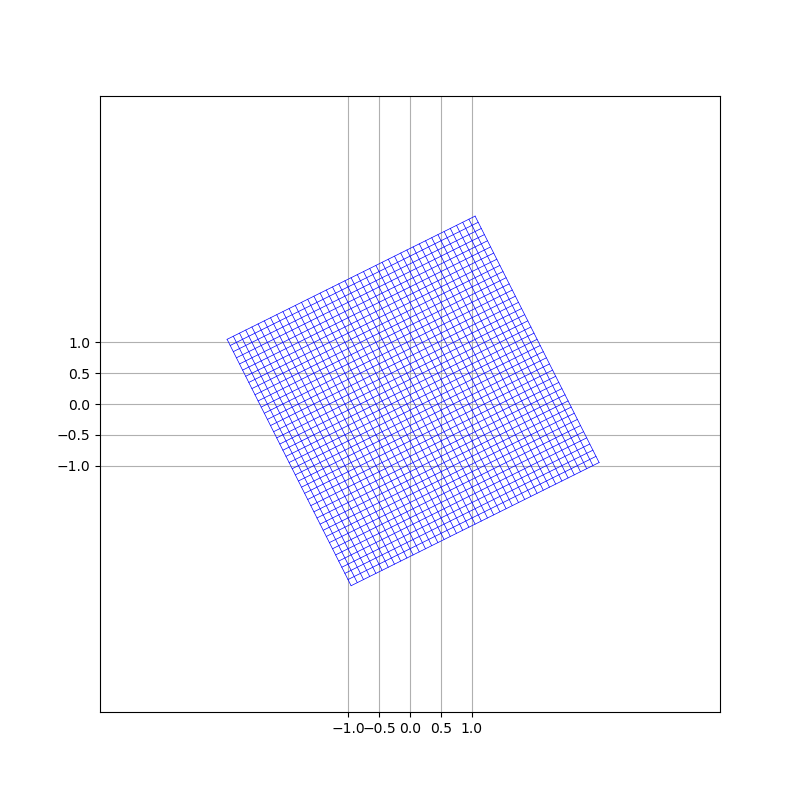

-26.56505117707799
-26.56505117707799


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(8, 8))

step = 0.05
rr = np.arange(-1, 1+step, step)

lt_w = np.array([[2, -1], [1, 2]])
lt_b = np.array([[1], [1]])

lt_w_x = lt_w[:,0]
lt_w_y = lt_w[:,1]
base_x = [1, 0]
base_y = [0, 1]
#计算x的长度
x_norm = np.linalg.norm(lt_w_x)
#计算y的长度
y_norm = np.linalg.norm(lt_w_y)


# 夹角cos值
cos_ = np.dot(lt_w_x, base_x) / (x_norm*1)
# 夹角sin值
sin_ = np.cross(lt_w_x, base_x) / (x_norm*1)
arctan2_ = np.arctan2(sin_, cos_)
x_alpha = arctan2_
#将弧度转化为角度
x_deg = np.rad2deg(arctan2_)
print(x_deg)

# 夹角cos值
cos_ = np.dot(lt_w_y, base_y) / (y_norm*1)
# 夹角sin值
sin_ = np.cross(lt_w_y, base_y) / (y_norm*1)
arctan2_ = np.arctan2(sin_, cos_)
y_alpha = arctan2_
#将弧度转化为角度
y_deg = np.rad2deg(arctan2_)
print(y_deg)

def set_lim(r=1):
    step = r/10
    ax.set_xlim(-r, r)
    ax.set_ylim(-r, r)
    xticks = np.arange(-1, 1+step, step)
    yticks = np.arange(-1, 1+step, step)
    ax.xaxis.set_ticks(xticks)
    ax.yaxis.set_ticks(yticks)

def linear_transformation_w(i): 
    i = i % transition
    color = "green"
    alpha = (i+1) / transition * x_alpha
    new_x_x = base_x[1]*np.sin(alpha) + base_x[0]*np.cos(alpha)
    new_x_y = base_x[1]*np.cos(alpha) - base_x[0]*np.sin(alpha)
    
    alpha = (i+1) / transition * y_alpha
    new_y_x = base_y[1]*np.sin(alpha) + base_y[0]*np.cos(alpha)
    new_y_y = base_y[1]*np.cos(alpha) - base_y[0]*np.sin(alpha)
        
    x_ratio = np.linspace(1, x_norm, transition+1)[i+1]
    y_ratio = np.linspace(1, y_norm, transition+1)[i+1]
    
    w = np.array([[new_x_x*x_ratio, new_y_x*y_ratio], 
                  [new_x_y*x_ratio, new_y_y*y_ratio]])
    if i+1 == transition:
        w = lt_w
    # X
    for yy in rr:
        new_x = np.dot(w, [rr, [yy] * len(rr)])
        ax.plot(*new_x,  c=color, lw=0.5)
    # Y
    for xx in rr:
        new_y = np.dot(w, [[xx] * len(rr), rr])
        ax.plot(*new_y, c=color, lw=0.5)

def linear_transformation_b(i):
    i = i % transition
    color = "blue"
    w = lt_w
    b =  (i+1) / transition * lt_b
    # new X
    for yy in rr:
        new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
        ax.plot(*new_x,  c=color, lw=0.5)

    # new Y
    for xx in rr:
        new_y = np.dot(w, [[xx] * len(rr), rr]) + b
        ax.plot(*new_y, c=color, lw=0.5)

def nonlinear_transformation(i):
    set_lim(1)
    i = i % transition
    color = "red"
    w = lt_w
    b = lt_b
    x_ratio = np.linspace(x_norm, 1, transition+1)[i+1]
    y_ratio = np.linspace(y_norm, 1, transition+1)[i+1]
    # Activation  X
    for yy in rr:
        new_x = np.dot(w, [rr, [yy] * len(rr)]) + b
        act_x = np.tanh(new_x) * x_ratio
        ax.plot(*act_x,  c=color, lw=0.5)

    # Activation Y
    for xx in rr:
        new_y = np.dot(w, [[xx] * len(rr), rr]) + b
        act_y = np.tanh(new_y) * y_ratio
        ax.plot(*act_y, c=color, lw=0.5)
        
def init(r=1):
    step = r/10
    for xx in np.arange(-1, 1+step, step):
        ax.axvline(x=xx, c="gray", lw=0.5)  # 添加垂直直线
    for yy in np.arange(-1, 1+step, step):
        ax.axhline(y=yy, c="gray", lw=0.5)  # 添加水平直线


def animate(i):
    ax.cla()
    set_lim(5)
    ax.grid()
    #line.set_data(xdata, ydata)  # 重新设置曲线的值
    if i in range(transition):
        linear_transformation_w(i)
    elif i in range(transition, transition*2):
        linear_transformation_b(i)
    elif i in range(transition*2, transition*3):
        nonlinear_transformation(i)
    else:
        init()

set_lim()
transition = 20
ani = animation.FuncAnimation(fig, animate, frames=transition*3+50, init_func=init, interval=100, blit=True)
plt.show()

# 泛化误差

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 期望与方差

In [137]:
x = np.arange(0, 1+0.01, 0.01)
y1 = x
y2 = 0.5*x
y3 = 0.4*x**2 + 0.3*x*np.sin(15*x) + 0.01*np.cos(5*x)


In [138]:
mean_y1 = np.mean(y1)
mean_y2 = np.mean(y2)
mean_y3 = np.mean(y3)

var_y1 = np.var(y1)
var_y2 = np.var(y2)
var_y3 = np.var(y3)

print("mean:%s, var:%s" % (mean_y1, var_y1))
print("mean:%s, var:%s" % (mean_y2, var_y2))
print("mean:%s, var:%s" % (mean_y3, var_y3))

mean:0.49999999999999994, var:0.085
mean:0.24999999999999997, var:0.02125
mean:0.14900604273656565, var:0.04029156976487087


No handles with labels found to put in legend.


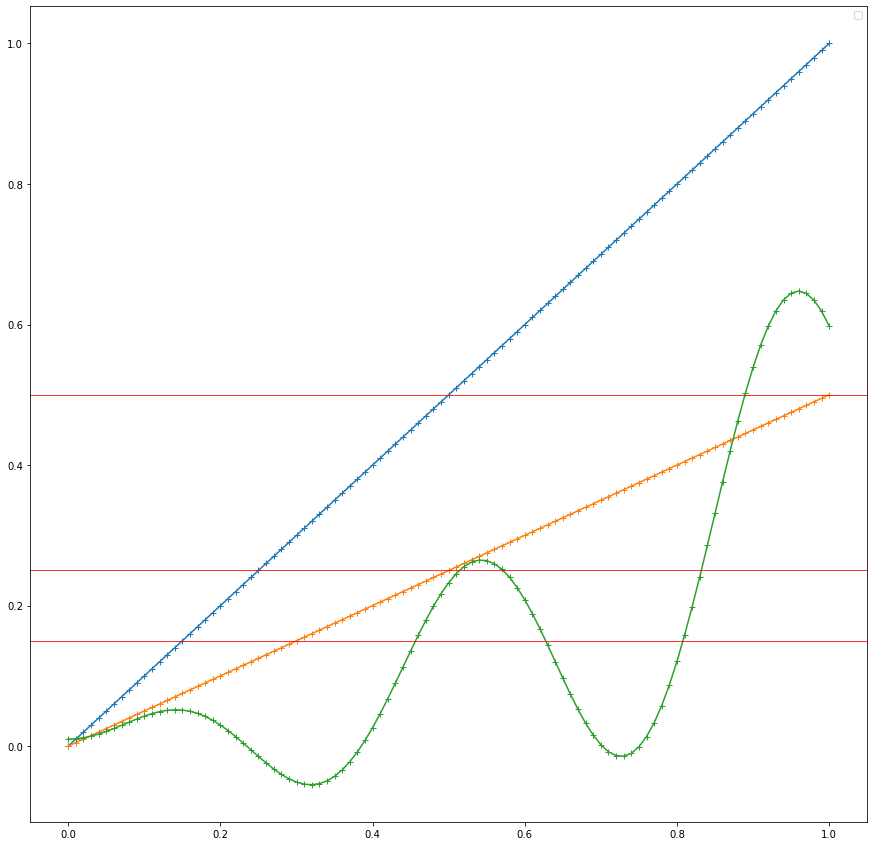

In [139]:
fig = plt.figure(figsize=(15,15))
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
plt.plot(x, y1, marker="+")
plt.plot(x, y2, marker="+")
plt.plot(x, y3, marker="+")


plt.axhline(y=mean_y1, c="red", lw=0.8) #添加水平直线
plt.axhline(y=mean_y2, c="red", lw=0.8) #添加水平直线
plt.axhline(y=mean_y3, c="red", lw=0.8) #添加水平直线
plt.legend()

### 期望与方差的关系

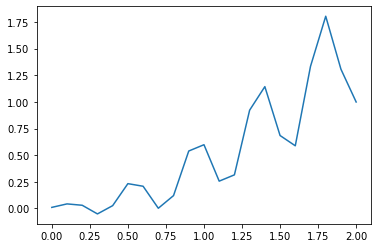

In [140]:
def foo(x):
    y = 2*x-2
    y = 0.4*x**2 + 0.3*x*np.sin(15*x) + 0.01*np.cos(5*x)
    return y

l = 2
x = np.arange(0, l+0.1, 0.1)
y = foo(x)

plt.plot(x, y)

In [150]:
def get_data(l):
    x = np.arange(0, l, 0.1)
    y = foo(x)
    return x, y


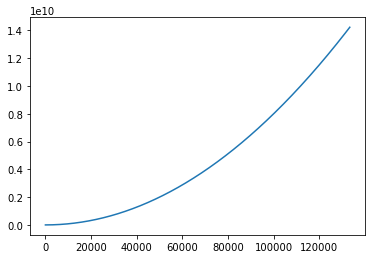

In [151]:
mean = []
var = []
for i in range(1000):
    x, y = get_data(i+1)
    mean_y = np.mean(y)
    var_y = np.var(y)
    mean.append(mean_y)
    var.append(var_y)

plt.plot(mean, var)

## 案例

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x1, y1 = (0.4, 0)
x2, y2 = (0.4, 0)

r1 = 0.3
r2 = 0.5

In [33]:
# https://blog.csdn.net/a352614834/article/details/104032402
import random
def generateRandomPointFromAnnulus2(r1,r2):
    """
    在圆环内随机取点, r1<=r2
    :param r1: 内径
    :param r2: 外径
    :return:
    """
    assert r1<= r2
    a = 1 / (r2*r2-r1*r1)
    random_r = math.sqrt(random.uniform(0, 1) / a  + r1 * r1)
    random_theta = random.uniform(0, 2 * math.pi)
    return random_r * math.cos(random_theta), random_r * math.sin(random_theta)

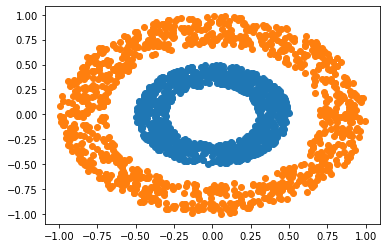

In [63]:
# Circle 1
x_list = []
y_list = []
num = 1001
for x in np.linspace(x1-r1, x1+r1, num):
    y = math.sqrt(r1 ** 2 - (x-x1)**2)
    x_list.append(x)
    y_list.append(y)
    x_list.append(x)
    y_list.append(-y)
# plt.scatter(x_list, y_list, color="red")
c1_x1 = x_list
c1_x2 = y_list
c1_x = list(zip(c1_x1, c1_x2))
c1_y = [0] * len(x_list)

# Circle 2
x_list = []
y_list = []
for x in np.linspace(x2-r2, x2+r2, num):
    y = math.sqrt((r2 + (x-x2))*(r2 - (x-x2)))
    x_list.append(x)
    y_list.append(y)
    x_list.append(x)
    y_list.append(-y)    
c2_x1 = x_list
c2_x2 = y_list
c2_x = list(zip(c1_x1, c1_x2))
c2_y = [1] * len(x_list)
# plt.scatter(x_list, y_list, color="blue")

# 圆环
c = []
for x in range(1000):
    x, y = generateRandomPointFromAnnulus2(0.3, 0.5)
    c.append([x, y])
c = np.array(c)
plt.scatter(c[:, 0], c[:, 1])
c1_x = c
c1_y = [0] * len(c)

c = []
for x in range(1000):
    x, y = generateRandomPointFromAnnulus2(0.7, 1)
    c.append([x, y])
c = np.array(c)
plt.scatter(c[:, 0], c[:, 1])
c2_x = c
c2_y = [1] * len(c)
    

In [41]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import train_test_split

In [64]:
x = np.vstack((c1_x, c2_x))
y = c1_y + c2_y

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=33)
len(x_train)

1800

In [153]:
clf = MLP()
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [160]:
mlp = MLP(hidden_layer_sizes=(2,), activation='tanh', solver='adam', max_iter=10**6, tol=1e-8, verbose=True)
mlp.fit(x_train, y_train)
s = mlp.score(x_train, y_train)
s

Iteration 1, loss = 0.70161364
Iteration 2, loss = 0.70107883
Iteration 3, loss = 0.70062177
Iteration 4, loss = 0.70021953
Iteration 5, loss = 0.69986458
Iteration 6, loss = 0.69951928
Iteration 7, loss = 0.69919106
Iteration 8, loss = 0.69891072
Iteration 9, loss = 0.69861556
Iteration 10, loss = 0.69835391
Iteration 11, loss = 0.69809592
Iteration 12, loss = 0.69787209
Iteration 13, loss = 0.69764577
Iteration 14, loss = 0.69742938
Iteration 15, loss = 0.69725361
Iteration 16, loss = 0.69706473
Iteration 17, loss = 0.69685340
Iteration 18, loss = 0.69671451
Iteration 19, loss = 0.69652021
Iteration 20, loss = 0.69637978
Iteration 21, loss = 0.69625153
Iteration 22, loss = 0.69607001
Iteration 23, loss = 0.69592418
Iteration 24, loss = 0.69580271
Iteration 25, loss = 0.69570058
Iteration 26, loss = 0.69554825
Iteration 27, loss = 0.69543002
Iteration 28, loss = 0.69533033
Iteration 29, loss = 0.69522705
Iteration 30, loss = 0.69512292
Iteration 31, loss = 0.69502398
Iteration 32, los

Iteration 257, loss = 0.57221894
Iteration 258, loss = 0.57175963
Iteration 259, loss = 0.57134056
Iteration 260, loss = 0.57090240
Iteration 261, loss = 0.57043789
Iteration 262, loss = 0.57000319
Iteration 263, loss = 0.56955392
Iteration 264, loss = 0.56912494
Iteration 265, loss = 0.56871411
Iteration 266, loss = 0.56824476
Iteration 267, loss = 0.56782688
Iteration 268, loss = 0.56740677
Iteration 269, loss = 0.56696854
Iteration 270, loss = 0.56654985
Iteration 271, loss = 0.56614086
Iteration 272, loss = 0.56571590
Iteration 273, loss = 0.56527504
Iteration 274, loss = 0.56487959
Iteration 275, loss = 0.56448766
Iteration 276, loss = 0.56405233
Iteration 277, loss = 0.56364809
Iteration 278, loss = 0.56327854
Iteration 279, loss = 0.56286836
Iteration 280, loss = 0.56242540
Iteration 281, loss = 0.56202416
Iteration 282, loss = 0.56162917
Iteration 283, loss = 0.56125013
Iteration 284, loss = 0.56083656
Iteration 285, loss = 0.56046276
Iteration 286, loss = 0.56005059
Iteration 

Iteration 519, loss = 0.51111627
Iteration 520, loss = 0.51105321
Iteration 521, loss = 0.51092032
Iteration 522, loss = 0.51081239
Iteration 523, loss = 0.51078111
Iteration 524, loss = 0.51061461
Iteration 525, loss = 0.51053639
Iteration 526, loss = 0.51045364
Iteration 527, loss = 0.51036561
Iteration 528, loss = 0.51023515
Iteration 529, loss = 0.51016922
Iteration 530, loss = 0.51005920
Iteration 531, loss = 0.50999669
Iteration 532, loss = 0.50989766
Iteration 533, loss = 0.50979388
Iteration 534, loss = 0.50973671
Iteration 535, loss = 0.50964207
Iteration 536, loss = 0.50951981
Iteration 537, loss = 0.50944833
Iteration 538, loss = 0.50952357
Iteration 539, loss = 0.50930660
Iteration 540, loss = 0.50921013
Iteration 541, loss = 0.50909242
Iteration 542, loss = 0.50901644
Iteration 543, loss = 0.50893750
Iteration 544, loss = 0.50882431
Iteration 545, loss = 0.50875349
Iteration 546, loss = 0.50864882
Iteration 547, loss = 0.50856967
Iteration 548, loss = 0.50849728
Iteration 

Iteration 808, loss = 0.49491717
Iteration 809, loss = 0.49488839
Iteration 810, loss = 0.49486607
Iteration 811, loss = 0.49479567
Iteration 812, loss = 0.49476250
Iteration 813, loss = 0.49473133
Iteration 814, loss = 0.49470776
Iteration 815, loss = 0.49464862
Iteration 816, loss = 0.49466862
Iteration 817, loss = 0.49459642
Iteration 818, loss = 0.49461041
Iteration 819, loss = 0.49451676
Iteration 820, loss = 0.49446602
Iteration 821, loss = 0.49445623
Iteration 822, loss = 0.49446924
Iteration 823, loss = 0.49437259
Iteration 824, loss = 0.49435056
Iteration 825, loss = 0.49433316
Iteration 826, loss = 0.49428339
Iteration 827, loss = 0.49422318
Iteration 828, loss = 0.49424192
Iteration 829, loss = 0.49416512
Iteration 830, loss = 0.49412176
Iteration 831, loss = 0.49409079
Iteration 832, loss = 0.49406590
Iteration 833, loss = 0.49403089
Iteration 834, loss = 0.49399756
Iteration 835, loss = 0.49396601
Iteration 836, loss = 0.49390799
Iteration 837, loss = 0.49391729
Iteration 

Iteration 1101, loss = 0.48550300
Iteration 1102, loss = 0.48549279
Iteration 1103, loss = 0.48546286
Iteration 1104, loss = 0.48539754
Iteration 1105, loss = 0.48538621
Iteration 1106, loss = 0.48536785
Iteration 1107, loss = 0.48532969
Iteration 1108, loss = 0.48528146
Iteration 1109, loss = 0.48525463
Iteration 1110, loss = 0.48532229
Iteration 1111, loss = 0.48518043
Iteration 1112, loss = 0.48514372
Iteration 1113, loss = 0.48514713
Iteration 1114, loss = 0.48511153
Iteration 1115, loss = 0.48507803
Iteration 1116, loss = 0.48503299
Iteration 1117, loss = 0.48505359
Iteration 1118, loss = 0.48499218
Iteration 1119, loss = 0.48492881
Iteration 1120, loss = 0.48490277
Iteration 1121, loss = 0.48488498
Iteration 1122, loss = 0.48484975
Iteration 1123, loss = 0.48480515
Iteration 1124, loss = 0.48477811
Iteration 1125, loss = 0.48475340
Iteration 1126, loss = 0.48473485
Iteration 1127, loss = 0.48468720
Iteration 1128, loss = 0.48466167
Iteration 1129, loss = 0.48462296
Iteration 1130

Iteration 1346, loss = 0.47683828
Iteration 1347, loss = 0.47680751
Iteration 1348, loss = 0.47676010
Iteration 1349, loss = 0.47673716
Iteration 1350, loss = 0.47666533
Iteration 1351, loss = 0.47670667
Iteration 1352, loss = 0.47671554
Iteration 1353, loss = 0.47654644
Iteration 1354, loss = 0.47650217
Iteration 1355, loss = 0.47646524
Iteration 1356, loss = 0.47642154
Iteration 1357, loss = 0.47637936
Iteration 1358, loss = 0.47633472
Iteration 1359, loss = 0.47630441
Iteration 1360, loss = 0.47634218
Iteration 1361, loss = 0.47621858
Iteration 1362, loss = 0.47616090
Iteration 1363, loss = 0.47615602
Iteration 1364, loss = 0.47612285
Iteration 1365, loss = 0.47607063
Iteration 1366, loss = 0.47599969
Iteration 1367, loss = 0.47597907
Iteration 1368, loss = 0.47591405
Iteration 1369, loss = 0.47588501
Iteration 1370, loss = 0.47582821
Iteration 1371, loss = 0.47578844
Iteration 1372, loss = 0.47575087
Iteration 1373, loss = 0.47569870
Iteration 1374, loss = 0.47568292
Iteration 1375

Iteration 1588, loss = 0.46617996
Iteration 1589, loss = 0.46614499
Iteration 1590, loss = 0.46607002
Iteration 1591, loss = 0.46606177
Iteration 1592, loss = 0.46597415
Iteration 1593, loss = 0.46595996
Iteration 1594, loss = 0.46590903
Iteration 1595, loss = 0.46585330
Iteration 1596, loss = 0.46580074
Iteration 1597, loss = 0.46576259
Iteration 1598, loss = 0.46571688
Iteration 1599, loss = 0.46567489
Iteration 1600, loss = 0.46565121
Iteration 1601, loss = 0.46559221
Iteration 1602, loss = 0.46554815
Iteration 1603, loss = 0.46553444
Iteration 1604, loss = 0.46545194
Iteration 1605, loss = 0.46541302
Iteration 1606, loss = 0.46535911
Iteration 1607, loss = 0.46532497
Iteration 1608, loss = 0.46530582
Iteration 1609, loss = 0.46527922
Iteration 1610, loss = 0.46520579
Iteration 1611, loss = 0.46517066
Iteration 1612, loss = 0.46514754
Iteration 1613, loss = 0.46508670
Iteration 1614, loss = 0.46505903
Iteration 1615, loss = 0.46499453
Iteration 1616, loss = 0.46494128
Iteration 1617

Iteration 1839, loss = 0.45604287
Iteration 1840, loss = 0.45602656
Iteration 1841, loss = 0.45597746
Iteration 1842, loss = 0.45595215
Iteration 1843, loss = 0.45589616
Iteration 1844, loss = 0.45586992
Iteration 1845, loss = 0.45583598
Iteration 1846, loss = 0.45579720
Iteration 1847, loss = 0.45576039
Iteration 1848, loss = 0.45572576
Iteration 1849, loss = 0.45568242
Iteration 1850, loss = 0.45565180
Iteration 1851, loss = 0.45562892
Iteration 1852, loss = 0.45558392
Iteration 1853, loss = 0.45555068
Iteration 1854, loss = 0.45553903
Iteration 1855, loss = 0.45548385
Iteration 1856, loss = 0.45543857
Iteration 1857, loss = 0.45541691
Iteration 1858, loss = 0.45539206
Iteration 1859, loss = 0.45535215
Iteration 1860, loss = 0.45531374
Iteration 1861, loss = 0.45526816
Iteration 1862, loss = 0.45526597
Iteration 1863, loss = 0.45522216
Iteration 1864, loss = 0.45515870
Iteration 1865, loss = 0.45513387
Iteration 1866, loss = 0.45511807
Iteration 1867, loss = 0.45508429
Iteration 1868

Iteration 2091, loss = 0.44766124
Iteration 2092, loss = 0.44764282
Iteration 2093, loss = 0.44761726
Iteration 2094, loss = 0.44757250
Iteration 2095, loss = 0.44753092
Iteration 2096, loss = 0.44750797
Iteration 2097, loss = 0.44749608
Iteration 2098, loss = 0.44743342
Iteration 2099, loss = 0.44742700
Iteration 2100, loss = 0.44742918
Iteration 2101, loss = 0.44735717
Iteration 2102, loss = 0.44730673
Iteration 2103, loss = 0.44726943
Iteration 2104, loss = 0.44726287
Iteration 2105, loss = 0.44721964
Iteration 2106, loss = 0.44718881
Iteration 2107, loss = 0.44715051
Iteration 2108, loss = 0.44712097
Iteration 2109, loss = 0.44709159
Iteration 2110, loss = 0.44703825
Iteration 2111, loss = 0.44702427
Iteration 2112, loss = 0.44699384
Iteration 2113, loss = 0.44694676
Iteration 2114, loss = 0.44693219
Iteration 2115, loss = 0.44690596
Iteration 2116, loss = 0.44690224
Iteration 2117, loss = 0.44682225
Iteration 2118, loss = 0.44678184
Iteration 2119, loss = 0.44676457
Iteration 2120

Iteration 2354, loss = 0.43900191
Iteration 2355, loss = 0.43898953
Iteration 2356, loss = 0.43896870
Iteration 2357, loss = 0.43891066
Iteration 2358, loss = 0.43887320
Iteration 2359, loss = 0.43885678
Iteration 2360, loss = 0.43882621
Iteration 2361, loss = 0.43880729
Iteration 2362, loss = 0.43878912
Iteration 2363, loss = 0.43872350
Iteration 2364, loss = 0.43869791
Iteration 2365, loss = 0.43868294
Iteration 2366, loss = 0.43867453
Iteration 2367, loss = 0.43862357
Iteration 2368, loss = 0.43857892
Iteration 2369, loss = 0.43855321
Iteration 2370, loss = 0.43852032
Iteration 2371, loss = 0.43847610
Iteration 2372, loss = 0.43846158
Iteration 2373, loss = 0.43842946
Iteration 2374, loss = 0.43839742
Iteration 2375, loss = 0.43839787
Iteration 2376, loss = 0.43833636
Iteration 2377, loss = 0.43833159
Iteration 2378, loss = 0.43827752
Iteration 2379, loss = 0.43826221
Iteration 2380, loss = 0.43822272
Iteration 2381, loss = 0.43821329
Iteration 2382, loss = 0.43815989
Iteration 2383

Iteration 2618, loss = 0.43246158
Iteration 2619, loss = 0.43239236
Iteration 2620, loss = 0.43237570
Iteration 2621, loss = 0.43238023
Iteration 2622, loss = 0.43234950
Iteration 2623, loss = 0.43233457
Iteration 2624, loss = 0.43229670
Iteration 2625, loss = 0.43229738
Iteration 2626, loss = 0.43226584
Iteration 2627, loss = 0.43223970
Iteration 2628, loss = 0.43223189
Iteration 2629, loss = 0.43220611
Iteration 2630, loss = 0.43219107
Iteration 2631, loss = 0.43216365
Iteration 2632, loss = 0.43214417
Iteration 2633, loss = 0.43213085
Iteration 2634, loss = 0.43211531
Iteration 2635, loss = 0.43211130
Iteration 2636, loss = 0.43207581
Iteration 2637, loss = 0.43205022
Iteration 2638, loss = 0.43203691
Iteration 2639, loss = 0.43202731
Iteration 2640, loss = 0.43199654
Iteration 2641, loss = 0.43197642
Iteration 2642, loss = 0.43195389
Iteration 2643, loss = 0.43193740
Iteration 2644, loss = 0.43192159
Iteration 2645, loss = 0.43190883
Iteration 2646, loss = 0.43188404
Iteration 2647

Iteration 2888, loss = 0.42816879
Iteration 2889, loss = 0.42817749
Iteration 2890, loss = 0.42815561
Iteration 2891, loss = 0.42814606
Iteration 2892, loss = 0.42812496
Iteration 2893, loss = 0.42810721
Iteration 2894, loss = 0.42810383
Iteration 2895, loss = 0.42808447
Iteration 2896, loss = 0.42808075
Iteration 2897, loss = 0.42805818
Iteration 2898, loss = 0.42805062
Iteration 2899, loss = 0.42805839
Iteration 2900, loss = 0.42801762
Iteration 2901, loss = 0.42801739
Iteration 2902, loss = 0.42799936
Iteration 2903, loss = 0.42798717
Iteration 2904, loss = 0.42796633
Iteration 2905, loss = 0.42795579
Iteration 2906, loss = 0.42796605
Iteration 2907, loss = 0.42793716
Iteration 2908, loss = 0.42792432
Iteration 2909, loss = 0.42790901
Iteration 2910, loss = 0.42790378
Iteration 2911, loss = 0.42790512
Iteration 2912, loss = 0.42787955
Iteration 2913, loss = 0.42788082
Iteration 2914, loss = 0.42784491
Iteration 2915, loss = 0.42785526
Iteration 2916, loss = 0.42782964
Iteration 2917

Iteration 3178, loss = 0.42507222
Iteration 3179, loss = 0.42507269
Iteration 3180, loss = 0.42503364
Iteration 3181, loss = 0.42505064
Iteration 3182, loss = 0.42501635
Iteration 3183, loss = 0.42501195
Iteration 3184, loss = 0.42499428
Iteration 3185, loss = 0.42500668
Iteration 3186, loss = 0.42498577
Iteration 3187, loss = 0.42497109
Iteration 3188, loss = 0.42496650
Iteration 3189, loss = 0.42498723
Iteration 3190, loss = 0.42495707
Iteration 3191, loss = 0.42494179
Iteration 3192, loss = 0.42495742
Iteration 3193, loss = 0.42491644
Iteration 3194, loss = 0.42491206
Iteration 3195, loss = 0.42490757
Iteration 3196, loss = 0.42489723
Iteration 3197, loss = 0.42489337
Iteration 3198, loss = 0.42487734
Iteration 3199, loss = 0.42488971
Iteration 3200, loss = 0.42487598
Iteration 3201, loss = 0.42485519
Iteration 3202, loss = 0.42483987
Iteration 3203, loss = 0.42483384
Iteration 3204, loss = 0.42483107
Iteration 3205, loss = 0.42481354
Iteration 3206, loss = 0.42481157
Iteration 3207

Iteration 3425, loss = 0.42304103
Iteration 3426, loss = 0.42302313
Iteration 3427, loss = 0.42299261
Iteration 3428, loss = 0.42300193
Iteration 3429, loss = 0.42297749
Iteration 3430, loss = 0.42300455
Iteration 3431, loss = 0.42298259
Iteration 3432, loss = 0.42295437
Iteration 3433, loss = 0.42296078
Iteration 3434, loss = 0.42295231
Iteration 3435, loss = 0.42293885
Iteration 3436, loss = 0.42292165
Iteration 3437, loss = 0.42292430
Iteration 3438, loss = 0.42291982
Iteration 3439, loss = 0.42290347
Iteration 3440, loss = 0.42290430
Iteration 3441, loss = 0.42289682
Iteration 3442, loss = 0.42288911
Iteration 3443, loss = 0.42287265
Iteration 3444, loss = 0.42286995
Iteration 3445, loss = 0.42287177
Iteration 3446, loss = 0.42287756
Iteration 3447, loss = 0.42285820
Iteration 3448, loss = 0.42289896
Iteration 3449, loss = 0.42285771
Iteration 3450, loss = 0.42283453
Iteration 3451, loss = 0.42283301
Iteration 3452, loss = 0.42282279
Iteration 3453, loss = 0.42280317
Iteration 3454

Iteration 3669, loss = 0.42138605
Iteration 3670, loss = 0.42141803
Iteration 3671, loss = 0.42140334
Iteration 3672, loss = 0.42136937
Iteration 3673, loss = 0.42137044
Iteration 3674, loss = 0.42135650
Iteration 3675, loss = 0.42136755
Iteration 3676, loss = 0.42134063
Iteration 3677, loss = 0.42134145
Iteration 3678, loss = 0.42132542
Iteration 3679, loss = 0.42132643
Iteration 3680, loss = 0.42132192
Iteration 3681, loss = 0.42131893
Iteration 3682, loss = 0.42131654
Iteration 3683, loss = 0.42133157
Iteration 3684, loss = 0.42129531
Iteration 3685, loss = 0.42129906
Iteration 3686, loss = 0.42128871
Iteration 3687, loss = 0.42129790
Iteration 3688, loss = 0.42128039
Iteration 3689, loss = 0.42126845
Iteration 3690, loss = 0.42126330
Iteration 3691, loss = 0.42126440
Iteration 3692, loss = 0.42125262
Iteration 3693, loss = 0.42124241
Iteration 3694, loss = 0.42125380
Iteration 3695, loss = 0.42124043
Iteration 3696, loss = 0.42125053
Iteration 3697, loss = 0.42122694
Iteration 3698

Iteration 3950, loss = 0.41986850
Iteration 3951, loss = 0.41986469
Iteration 3952, loss = 0.41986532
Iteration 3953, loss = 0.41986409
Iteration 3954, loss = 0.41986102
Iteration 3955, loss = 0.41984494
Iteration 3956, loss = 0.41987506
Iteration 3957, loss = 0.41985529
Iteration 3958, loss = 0.41986393
Iteration 3959, loss = 0.41984234
Iteration 3960, loss = 0.41982245
Iteration 3961, loss = 0.41981827
Iteration 3962, loss = 0.41981502
Iteration 3963, loss = 0.41981372
Iteration 3964, loss = 0.41981968
Iteration 3965, loss = 0.41980006
Iteration 3966, loss = 0.41979257
Iteration 3967, loss = 0.41978775
Iteration 3968, loss = 0.41977880
Iteration 3969, loss = 0.41978027
Iteration 3970, loss = 0.41977832
Iteration 3971, loss = 0.41976233
Iteration 3972, loss = 0.41976957
Iteration 3973, loss = 0.41975137
Iteration 3974, loss = 0.41974799
Iteration 3975, loss = 0.41975412
Iteration 3976, loss = 0.41975290
Iteration 3977, loss = 0.41973855
Iteration 3978, loss = 0.41973892
Iteration 3979

Iteration 4191, loss = 0.41877345
Iteration 4192, loss = 0.41876670
Iteration 4193, loss = 0.41876888
Iteration 4194, loss = 0.41875600
Iteration 4195, loss = 0.41875661
Iteration 4196, loss = 0.41874715
Iteration 4197, loss = 0.41874141
Iteration 4198, loss = 0.41874579
Iteration 4199, loss = 0.41875315
Iteration 4200, loss = 0.41872744
Iteration 4201, loss = 0.41872863
Iteration 4202, loss = 0.41873506
Iteration 4203, loss = 0.41872129
Iteration 4204, loss = 0.41872390
Iteration 4205, loss = 0.41870619
Iteration 4206, loss = 0.41872348
Iteration 4207, loss = 0.41870854
Iteration 4208, loss = 0.41869866
Iteration 4209, loss = 0.41869609
Iteration 4210, loss = 0.41869678
Iteration 4211, loss = 0.41870342
Iteration 4212, loss = 0.41867704
Iteration 4213, loss = 0.41867673
Iteration 4214, loss = 0.41867116
Iteration 4215, loss = 0.41868925
Iteration 4216, loss = 0.41867490
Iteration 4217, loss = 0.41869884
Iteration 4218, loss = 0.41865667
Iteration 4219, loss = 0.41868677
Iteration 4220

Iteration 4447, loss = 0.41779712
Iteration 4448, loss = 0.41779253
Iteration 4449, loss = 0.41774635
Iteration 4450, loss = 0.41775577
Iteration 4451, loss = 0.41774183
Iteration 4452, loss = 0.41774401
Iteration 4453, loss = 0.41773797
Iteration 4454, loss = 0.41774904
Iteration 4455, loss = 0.41773342
Iteration 4456, loss = 0.41772742
Iteration 4457, loss = 0.41772325
Iteration 4458, loss = 0.41772834
Iteration 4459, loss = 0.41772115
Iteration 4460, loss = 0.41771993
Iteration 4461, loss = 0.41770380
Iteration 4462, loss = 0.41773143
Iteration 4463, loss = 0.41769479
Iteration 4464, loss = 0.41770586
Iteration 4465, loss = 0.41775045
Iteration 4466, loss = 0.41768975
Iteration 4467, loss = 0.41769778
Iteration 4468, loss = 0.41770150
Iteration 4469, loss = 0.41768413
Iteration 4470, loss = 0.41768318
Iteration 4471, loss = 0.41767404
Iteration 4472, loss = 0.41766789
Iteration 4473, loss = 0.41766089
Iteration 4474, loss = 0.41767227
Iteration 4475, loss = 0.41765101
Iteration 4476

Iteration 4706, loss = 0.41687601
Iteration 4707, loss = 0.41687699
Iteration 4708, loss = 0.41686363
Iteration 4709, loss = 0.41686250
Iteration 4710, loss = 0.41685860
Iteration 4711, loss = 0.41685144
Iteration 4712, loss = 0.41684757
Iteration 4713, loss = 0.41687129
Iteration 4714, loss = 0.41684359
Iteration 4715, loss = 0.41683732
Iteration 4716, loss = 0.41683655
Iteration 4717, loss = 0.41684831
Iteration 4718, loss = 0.41685685
Iteration 4719, loss = 0.41682924
Iteration 4720, loss = 0.41682675
Iteration 4721, loss = 0.41682811
Iteration 4722, loss = 0.41681701
Iteration 4723, loss = 0.41681802
Iteration 4724, loss = 0.41681003
Iteration 4725, loss = 0.41681339
Iteration 4726, loss = 0.41680632
Iteration 4727, loss = 0.41680927
Iteration 4728, loss = 0.41684035
Iteration 4729, loss = 0.41678904
Iteration 4730, loss = 0.41679748
Iteration 4731, loss = 0.41679048
Iteration 4732, loss = 0.41679272
Iteration 4733, loss = 0.41678626
Iteration 4734, loss = 0.41679008
Iteration 4735

Iteration 4986, loss = 0.41604437
Iteration 4987, loss = 0.41603733
Iteration 4988, loss = 0.41604013
Iteration 4989, loss = 0.41603215
Iteration 4990, loss = 0.41606542
Iteration 4991, loss = 0.41602591
Iteration 4992, loss = 0.41604595
Iteration 4993, loss = 0.41605609
Iteration 4994, loss = 0.41601695
Iteration 4995, loss = 0.41601323
Iteration 4996, loss = 0.41601105
Iteration 4997, loss = 0.41601954
Iteration 4998, loss = 0.41600997
Iteration 4999, loss = 0.41601250
Iteration 5000, loss = 0.41600810
Iteration 5001, loss = 0.41600290
Iteration 5002, loss = 0.41599849
Iteration 5003, loss = 0.41599149
Iteration 5004, loss = 0.41599036
Iteration 5005, loss = 0.41598650
Iteration 5006, loss = 0.41599248
Iteration 5007, loss = 0.41598498
Iteration 5008, loss = 0.41599630
Iteration 5009, loss = 0.41598594
Iteration 5010, loss = 0.41597906
Iteration 5011, loss = 0.41596938
Iteration 5012, loss = 0.41596829
Iteration 5013, loss = 0.41598016
Iteration 5014, loss = 0.41596355
Iteration 5015

Iteration 5266, loss = 0.41530109
Iteration 5267, loss = 0.41530186
Iteration 5268, loss = 0.41530713
Iteration 5269, loss = 0.41530487
Iteration 5270, loss = 0.41530011
Iteration 5271, loss = 0.41529455
Iteration 5272, loss = 0.41529112
Iteration 5273, loss = 0.41529032
Iteration 5274, loss = 0.41529157
Iteration 5275, loss = 0.41529057
Iteration 5276, loss = 0.41529851
Iteration 5277, loss = 0.41529133
Iteration 5278, loss = 0.41528059
Iteration 5279, loss = 0.41527804
Iteration 5280, loss = 0.41528917
Iteration 5281, loss = 0.41527592
Iteration 5282, loss = 0.41529774
Iteration 5283, loss = 0.41528022
Iteration 5284, loss = 0.41527894
Iteration 5285, loss = 0.41527070
Iteration 5286, loss = 0.41525831
Iteration 5287, loss = 0.41525899
Iteration 5288, loss = 0.41526261
Iteration 5289, loss = 0.41528721
Iteration 5290, loss = 0.41524492
Iteration 5291, loss = 0.41526852
Iteration 5292, loss = 0.41524915
Iteration 5293, loss = 0.41526096
Iteration 5294, loss = 0.41524381
Iteration 5295

Iteration 5541, loss = 0.41468668
Iteration 5542, loss = 0.41472736
Iteration 5543, loss = 0.41469631
Iteration 5544, loss = 0.41467707
Iteration 5545, loss = 0.41468408
Iteration 5546, loss = 0.41467028
Iteration 5547, loss = 0.41468674
Iteration 5548, loss = 0.41468895
Iteration 5549, loss = 0.41468050
Iteration 5550, loss = 0.41466498
Iteration 5551, loss = 0.41466721
Iteration 5552, loss = 0.41467661
Iteration 5553, loss = 0.41465787
Iteration 5554, loss = 0.41465172
Iteration 5555, loss = 0.41466046
Iteration 5556, loss = 0.41465129
Iteration 5557, loss = 0.41466194
Iteration 5558, loss = 0.41464804
Iteration 5559, loss = 0.41466868
Iteration 5560, loss = 0.41465275
Iteration 5561, loss = 0.41464158
Iteration 5562, loss = 0.41464362
Iteration 5563, loss = 0.41463930
Iteration 5564, loss = 0.41463444
Iteration 5565, loss = 0.41469299
Iteration 5566, loss = 0.41463352
Iteration 5567, loss = 0.41464400
Iteration 5568, loss = 0.41463767
Iteration 5569, loss = 0.41463157
Iteration 5570

Iteration 5821, loss = 0.41413287
Iteration 5822, loss = 0.41411503
Iteration 5823, loss = 0.41411452
Iteration 5824, loss = 0.41410774
Iteration 5825, loss = 0.41411380
Iteration 5826, loss = 0.41410610
Iteration 5827, loss = 0.41410555
Iteration 5828, loss = 0.41412250
Iteration 5829, loss = 0.41409996
Iteration 5830, loss = 0.41411321
Iteration 5831, loss = 0.41410012
Iteration 5832, loss = 0.41409030
Iteration 5833, loss = 0.41410758
Iteration 5834, loss = 0.41409096
Iteration 5835, loss = 0.41409273
Iteration 5836, loss = 0.41409373
Iteration 5837, loss = 0.41410767
Iteration 5838, loss = 0.41412152
Iteration 5839, loss = 0.41407897
Iteration 5840, loss = 0.41408757
Iteration 5841, loss = 0.41408000
Iteration 5842, loss = 0.41406671
Iteration 5843, loss = 0.41408966
Iteration 5844, loss = 0.41409440
Iteration 5845, loss = 0.41407054
Iteration 5846, loss = 0.41407727
Iteration 5847, loss = 0.41407000
Iteration 5848, loss = 0.41406335
Iteration 5849, loss = 0.41406837
Iteration 5850

Iteration 6086, loss = 0.41362916
Iteration 6087, loss = 0.41366580
Iteration 6088, loss = 0.41362508
Iteration 6089, loss = 0.41362660
Iteration 6090, loss = 0.41362352
Iteration 6091, loss = 0.41363626
Iteration 6092, loss = 0.41361483
Iteration 6093, loss = 0.41362308
Iteration 6094, loss = 0.41361169
Iteration 6095, loss = 0.41363638
Iteration 6096, loss = 0.41361218
Iteration 6097, loss = 0.41360251
Iteration 6098, loss = 0.41360780
Iteration 6099, loss = 0.41362178
Iteration 6100, loss = 0.41360386
Iteration 6101, loss = 0.41360120
Iteration 6102, loss = 0.41361567
Iteration 6103, loss = 0.41360113
Iteration 6104, loss = 0.41359079
Iteration 6105, loss = 0.41361268
Iteration 6106, loss = 0.41360753
Iteration 6107, loss = 0.41359680
Iteration 6108, loss = 0.41359886
Iteration 6109, loss = 0.41358577
Iteration 6110, loss = 0.41358777
Iteration 6111, loss = 0.41359049
Iteration 6112, loss = 0.41358988
Iteration 6113, loss = 0.41358382
Iteration 6114, loss = 0.41361040
Iteration 6115

Iteration 6347, loss = 0.41321010
Iteration 6348, loss = 0.41321086
Iteration 6349, loss = 0.41320446
Iteration 6350, loss = 0.41319442
Iteration 6351, loss = 0.41321303
Iteration 6352, loss = 0.41319372
Iteration 6353, loss = 0.41321306
Iteration 6354, loss = 0.41318875
Iteration 6355, loss = 0.41318613
Iteration 6356, loss = 0.41320240
Iteration 6357, loss = 0.41319409
Iteration 6358, loss = 0.41318784
Iteration 6359, loss = 0.41318164
Iteration 6360, loss = 0.41317946
Iteration 6361, loss = 0.41317635
Iteration 6362, loss = 0.41318506
Iteration 6363, loss = 0.41318013
Iteration 6364, loss = 0.41318187
Iteration 6365, loss = 0.41318206
Iteration 6366, loss = 0.41319026
Iteration 6367, loss = 0.41319626
Iteration 6368, loss = 0.41318374
Iteration 6369, loss = 0.41320115
Iteration 6370, loss = 0.41318002
Iteration 6371, loss = 0.41317764
Iteration 6372, loss = 0.41316510
Iteration 6373, loss = 0.41316982
Iteration 6374, loss = 0.41315843
Iteration 6375, loss = 0.41316668
Iteration 6376

Iteration 6622, loss = 0.41279466
Iteration 6623, loss = 0.41280232
Iteration 6624, loss = 0.41280060
Iteration 6625, loss = 0.41278945
Iteration 6626, loss = 0.41279679
Iteration 6627, loss = 0.41278680
Iteration 6628, loss = 0.41280168
Iteration 6629, loss = 0.41278433
Iteration 6630, loss = 0.41277566
Iteration 6631, loss = 0.41278857
Iteration 6632, loss = 0.41279527
Iteration 6633, loss = 0.41278409
Iteration 6634, loss = 0.41278415
Iteration 6635, loss = 0.41277610
Iteration 6636, loss = 0.41278265
Iteration 6637, loss = 0.41277045
Iteration 6638, loss = 0.41277930
Iteration 6639, loss = 0.41276679
Iteration 6640, loss = 0.41278088
Iteration 6641, loss = 0.41276970
Iteration 6642, loss = 0.41276855
Iteration 6643, loss = 0.41276403
Iteration 6644, loss = 0.41276804
Iteration 6645, loss = 0.41276772
Iteration 6646, loss = 0.41279139
Iteration 6647, loss = 0.41275396
Iteration 6648, loss = 0.41276769
Iteration 6649, loss = 0.41277698
Iteration 6650, loss = 0.41275796
Iteration 6651

Iteration 6888, loss = 0.41242940
Iteration 6889, loss = 0.41243568
Iteration 6890, loss = 0.41242389
Iteration 6891, loss = 0.41242483
Iteration 6892, loss = 0.41243458
Iteration 6893, loss = 0.41242755
Iteration 6894, loss = 0.41242436
Iteration 6895, loss = 0.41247094
Iteration 6896, loss = 0.41241183
Iteration 6897, loss = 0.41242338
Iteration 6898, loss = 0.41241857
Iteration 6899, loss = 0.41242668
Iteration 6900, loss = 0.41241020
Iteration 6901, loss = 0.41242625
Iteration 6902, loss = 0.41245323
Iteration 6903, loss = 0.41240649
Iteration 6904, loss = 0.41241357
Iteration 6905, loss = 0.41241191
Iteration 6906, loss = 0.41241146
Iteration 6907, loss = 0.41242468
Iteration 6908, loss = 0.41245009
Iteration 6909, loss = 0.41241126
Iteration 6910, loss = 0.41241222
Iteration 6911, loss = 0.41242060
Iteration 6912, loss = 0.41240294
Iteration 6913, loss = 0.41241608
Iteration 6914, loss = 0.41239513
Iteration 6915, loss = 0.41239278
Iteration 6916, loss = 0.41241922
Iteration 6917

Iteration 7139, loss = 0.41212140
Iteration 7140, loss = 0.41211361
Iteration 7141, loss = 0.41211424
Iteration 7142, loss = 0.41211912
Iteration 7143, loss = 0.41210862
Iteration 7144, loss = 0.41211676
Iteration 7145, loss = 0.41211020
Iteration 7146, loss = 0.41212226
Iteration 7147, loss = 0.41211423
Iteration 7148, loss = 0.41212248
Iteration 7149, loss = 0.41209883
Iteration 7150, loss = 0.41210286
Iteration 7151, loss = 0.41213769
Iteration 7152, loss = 0.41209671
Iteration 7153, loss = 0.41209820
Iteration 7154, loss = 0.41212864
Iteration 7155, loss = 0.41209596
Iteration 7156, loss = 0.41209441
Iteration 7157, loss = 0.41211000
Iteration 7158, loss = 0.41208643
Iteration 7159, loss = 0.41209590
Iteration 7160, loss = 0.41209411
Iteration 7161, loss = 0.41210331
Iteration 7162, loss = 0.41208486
Iteration 7163, loss = 0.41208422
Iteration 7164, loss = 0.41209251
Iteration 7165, loss = 0.41209150
Iteration 7166, loss = 0.41209761
Iteration 7167, loss = 0.41207950
Iteration 7168

Iteration 7390, loss = 0.41182383
Iteration 7391, loss = 0.41182759
Iteration 7392, loss = 0.41182867
Iteration 7393, loss = 0.41182208
Iteration 7394, loss = 0.41181772
Iteration 7395, loss = 0.41182752
Iteration 7396, loss = 0.41182329
Iteration 7397, loss = 0.41181884
Iteration 7398, loss = 0.41181392
Iteration 7399, loss = 0.41181136
Iteration 7400, loss = 0.41182075
Iteration 7401, loss = 0.41181707
Iteration 7402, loss = 0.41181925
Iteration 7403, loss = 0.41180988
Iteration 7404, loss = 0.41181473
Iteration 7405, loss = 0.41181134
Iteration 7406, loss = 0.41180250
Iteration 7407, loss = 0.41180078
Iteration 7408, loss = 0.41180616
Iteration 7409, loss = 0.41180681
Iteration 7410, loss = 0.41181451
Iteration 7411, loss = 0.41180521
Iteration 7412, loss = 0.41181209
Iteration 7413, loss = 0.41179891
Iteration 7414, loss = 0.41181025
Iteration 7415, loss = 0.41180354
Iteration 7416, loss = 0.41178941
Iteration 7417, loss = 0.41179458
Iteration 7418, loss = 0.41179203
Iteration 7419

Iteration 7634, loss = 0.41156081
Iteration 7635, loss = 0.41155921
Iteration 7636, loss = 0.41155822
Iteration 7637, loss = 0.41155966
Iteration 7638, loss = 0.41155011
Iteration 7639, loss = 0.41155286
Iteration 7640, loss = 0.41156467
Iteration 7641, loss = 0.41155538
Iteration 7642, loss = 0.41156056
Iteration 7643, loss = 0.41155479
Iteration 7644, loss = 0.41155529
Iteration 7645, loss = 0.41157796
Iteration 7646, loss = 0.41155473
Iteration 7647, loss = 0.41155161
Iteration 7648, loss = 0.41158343
Iteration 7649, loss = 0.41157945
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


0.8077777777777778

100%|████████████████████████████████████████████████████████████████████████| 40401/40401 [00:00<00:00, 810184.20it/s]


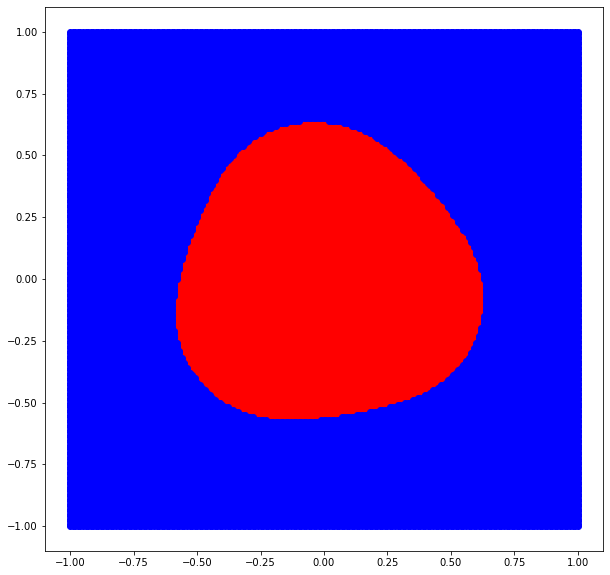

In [142]:
from tqdm import tqdm
fig = plt.figure(figsize=(10,10))

step = 0.01
pred_x = []
for x in tqdm(np.arange(-1, 1+step, step)):
    for y in np.arange(-1, 1+step, step):
        pred_x.append([x, y])        
pred_y = mlp.predict(pred_x)

c1_x = []
c1_y = []
c2_x = []
c2_y = []
i = 0
for pred in tqdm(pred_y): 
    x = pred_x[i][0]
    y = pred_x[i][1]
    if pred == 0:
        c1_x.append(x)
        c1_y.append(y)
    else:
        c2_x.append(x)
        c2_y.append(y)       
    i += 1
        
plt.scatter(c1_x, c1_y, color="red")
plt.scatter(c2_x, c2_y, color="blue") 

In [234]:
index=0
for w in mlp.coefs_:
    index += 1
    print('============================================')
    print('第{}层隐藏层:'.format(index))
    print('W:\n', w)
    print("B:\n", mlp.intercepts_[index-1])

第1层隐藏层:
W:
 [[-0.32142858 -0.25696419]
 [-0.41355303 -0.56868317]]
B:
 [ 0.58594936 -0.51000078]
第2层隐藏层:
W:
 [[-1.02759335]
 [ 1.08310256]]
B:
 [0.86346823]


In [2]:
#对线性模型的依赖对应于一个隐含的假设，即区分猫和狗的唯一要求是评估单个像素的强度。
# 多层感知机：通用近似定理
# 反向传播原理


# 反向传播算法

## 梯度下降

## 自动微分

计算机微分计算有四种方式：手工微分，数值微分，符号微分，自动微分。https://zhuanlan.zhihu.com/p/61103504

神经网络的反向传播的实现借助于自动微分。 然后编码进代码

### 计算图

In [2]:
# https://colah.github.io/posts/2015-08-Backprop/

import graphviz as gz

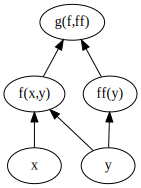

In [3]:
dot = gz.Digraph()
dot.attr(rankdir='BT')

dot.node('1', 'x')
dot.node('2', 'y')
dot.node('3', 'f(x,y)')
dot.node('4', 'ff(y)')
dot.node('5', 'g(f,ff)')

dot.edge('1', '3')
dot.edge('2', '3')
dot.edge('2', '4')
dot.edge('3', '5')
dot.edge('4', '5')
dot

### 链式法则

\begin{align*}
\frac{dy}{dx} &= \frac{dy}{dy} \cdot \frac{dy}{dv_n} \cdot \frac{dv_n}{dx} \\
          &= \frac{dy}{dv_n} \cdot \frac{dv_{n}}{dv_{n-1}} \cdot \frac{dv_{n-1}}{dx} \\
          &= \frac{dy}{dv_n} \cdot \frac{dv_{n}}{dv_{n-1}} \cdot \cdots \cdot \frac{dv_{i+1}}{dv_{i}} \cdot \frac{dv_{i}}{dv_{i-1}} \cdot \cdots \cdot \frac{dv_{2}}{dv_{1}} \cdot \frac{dv_{1}}{dx} \cdot \frac{dx}{dx} \\
\end{align*}

### 前向模式

In [5]:
# https://www.cnblogs.com/simplex/p/6777895.html

import numpy as np
from prettytable import PrettyTable

In [6]:
# 知道表达式以及自变量求因变量和导数
class ADT: # Abstract Data Type，ADT
    x = 0 # Value
    dx = 0 # Derivative

    def __init__(self, x, dx):
        self.x = x
        self.dx = dx

    def __str__(self):
        return "value:%s\nderivative:%s" % (self.x, self.dx)

    def __add__(self, other):
        if isinstance(other, ADT):
            x = self.x + other.x
            dx = self.dx + other.dx
        elif isinstance(other, int) or isinstance(other, float):
            x = self.x + other
            dx = self.dx
        else:
            return NotImplemented
        return ADT(x, dx)

    def __radd__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            x = self.x + other
            dx = self.dx
        else:
            return NotImplemented
        return ADT(x, dx)

    def __iadd__(self, other):
        if isinstance(other, ADT):
            self.x += other.x
            self.dx += other.dx
        elif isinstance(other, int) or isinstance(other, float):
            self.x += other
        else:
            return NotImplemented
        return self

    def __sub__(self, other):
        if isinstance(other, ADT):
            x = self.x - other.x
            dx = self.dx - other.dx
        elif isinstance(other, int) or isinstance(other, float):
            x = self.x - other
            dx = self.dx
        else:
            return NotImplemented
        return ADT(x, dx)

    def __rsub__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            x = other - self.x
            dx = -self.dx
        else:
            return NotImplemented
        return ADT(x, dx)

    def __isub__(self, other):
        if isinstance(other, ADT):
            self.x -= other.x
            self.dx -= other.dx
        elif isinstance(other, int) or isinstance(other, float):
            self.x -= other
        else:
            return NotImplemented
        return self

    def __mul__(self, other):
        if isinstance(other, ADT):
            x = self.x * other.x
            dx = self.x * other.dx + self.dx * other.x
        elif isinstance(other, int) or isinstance(other, float):
            x = self.x * other
            dx = self.dx * other
        else:
            return NotImplemented
        return ADT(x, dx)

    def __rmul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            x = self.x * other
            dx = self.dx * other
        else:
            return NotImplemented
        return ADT(x, dx)

    def __imul__(self, other):
        if isinstance(other, ADT):
            self.x *= other.x
            self.dx = self.x * other.dx + self.dx * other.x
        elif isinstance(other, int) or isinstance(other, float):
            self.x *= other
            self.dx *= other
        else:
            return NotImplemented
        return self

    def __truediv__(self, other):
        if isinstance(other, ADT):
            x = self.x / other.x
            dx = (self.dx * other.x - self.x * other.dx) / other.x**2
        elif isinstance(other, int) or isinstance(other, float):
            x = self.x / other
            dx = self.dx / other
        else:
            return NotImplemented
        return ADT(x, dx)

    def __rtruediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            x = other / self.x
            dx = -other / (self.x)**2 * self.dx
        else:
            return NotImplemented
        return ADT(x, dx)

    def __itruediv__(self, other):
        if isinstance(other, ADT):
            self.x /= other.x
            self.dx = (self.dx * other.x - self.x * other.dx) / other.x**2
        elif isinstance(other, int) or isinstance(other, float):
            self.x /= other
            self.dx /= other
        else:
            return NotImplemented
        return ADT(x, dx)

    def __pow__(self, n):
        x = self.x**n
        dx = n * self.x**(n - 1) * self.dx
        return ADT(x, dx)

    # some frequently used function

    def exp(this):
        x = np.exp(this.x)
        dx = this.dx * np.exp(this.x)
        return ADT(x, dx)

    def log(this):
        x = np.log(this.x)
        dx = 1 / this.x * this.dx
        return ADT(x, dx)

    def sin(this):
        x = np.sin(this.x)
        dx = this.dx * np.cos(this.x)
        return ADT(x, dx)

    def cos(this):
        x = np.cos(this.x)
        dx = -this.dx * np.sin(this.x)
        return ADT(x, dx)

In [7]:
def table_show(rows):
    table = PrettyTable()
    table.field_names = ["Method", "Value", "Derivative"]
    for row in rows:
        table.add_row(row)
    print(table)

In [8]:
## one-dimensional 1
x = 0.5
dx = 1

x_adt = ADT(x, dx) # x=0.5

result = ADT.exp((x_adt + 2)**2)

y_analytical = np.exp((x + 2)**2)
dy_analytical = 2 * (x + 2) * np.exp((x + 2)**2)

rows = [['auto diff', result.x, result.dx],
        ['symbol analytical', y_analytical, dy_analytical]]
table_show(rows)

+-------------------+------------------+------------------+
|       Method      |      Value       |    Derivative    |
+-------------------+------------------+------------------+
|     auto diff     | 518.012824668342 | 2590.06412334171 |
| symbol analytical | 518.012824668342 | 2590.06412334171 |
+-------------------+------------------+------------------+


### 后向模式

In [9]:
# https://www.cnblogs.com/simplex/p/6777895.html
import numpy as np
from enum import Enum
from prettytable import PrettyTable

In [10]:
class Computer_Graph:
    def __init__(self):
        self.Nodec = 0
        self.NodeList = []

    def connect(self):
        Node.cgraph = self
        return self

    def clear(self):
        self.Nodec = 0
        self.NodeList = []

    def disconnect(self):
        Node.cgraph = None
        return self

    def append(self, node):
        self.Nodec += 1
        self.NodeList.append(node)

    def compute_value(self):
        for node in self.NodeList:
            if node.op is Node.operators.add:
                node.value = self.NodeList[node.arg1].value + self.NodeList[
                    node.arg2].value
            elif node.op is Node.operators.sub:
                node.value = self.NodeList[node.arg1].value - self.NodeList[
                    node.arg2].value
            elif node.op is Node.operators.mul:
                node.value = self.NodeList[node.arg1].value * self.NodeList[
                    node.arg2].value
            elif node.op is Node.operators.truediv:
                node.value = self.NodeList[node.arg1].value / self.NodeList[
                    node.arg2].value
            elif node.op is Node.operators.power:
                node.value = self.NodeList[node.arg1].value**self.NodeList[
                    node.arg2].value
            elif node.op is Node.operators.sin:
                node.value = np.sin(self.NodeList[node.arg1].value)
            elif node.op is Node.operators.cos:
                node.value = np.cos(self.NodeList[node.arg1].value)
            elif node.op is Node.operators.log:
                node.value = np.log(self.NodeList[node.arg1].value)
            elif node.op is Node.operators.exp:
                node.value = np.exp(self.NodeList[node.arg1].value)

    def compute_gradient(self, seedID):
        for node in self.NodeList:
            node.derivative = 0.0
        self.NodeList[seedID].derivative = 1.0
        for node in self.NodeList[-1::-1]:
#             print(node.derivative)
            if node.op is Node.operators.add:
                self.NodeList[node.arg1].derivative += node.derivative
                self.NodeList[node.arg2].derivative += node.derivative
            elif node.op is Node.operators.sub:
                self.NodeList[node.arg1].derivative += node.derivative
                self.NodeList[node.arg2].derivative += -node.derivative
            elif node.op is Node.operators.mul:
                self.NodeList[node.arg1].derivative += node.derivative * self.NodeList[node.arg2].value
                self.NodeList[node.arg2].derivative += node.derivative * self.NodeList[node.arg1].value
            elif node.op is Node.operators.truediv:
                self.NodeList[node.arg1].derivative += node.derivative / self.NodeList[node.arg2].value
                self.NodeList[node.arg2].derivative += (-node.derivative * self.NodeList[node.arg1].value / 
                                                        (self.NodeList[node.arg2].value)**2)
            elif node.op is Node.operators.power:
                self.NodeList[node.arg1].derivative += (node.derivative * self.NodeList[node.arg2].value * 
                                                        self.NodeList[node.arg1].value**(self.NodeList[node.arg2].value - 1))
            elif node.op is Node.operators.sin:
                self.NodeList[node.arg1].derivative += node.derivative * np.cos(self.NodeList[node.arg1].value)
            elif node.op is Node.operators.cos:
                self.NodeList[node.arg1].derivative += -node.derivative * np.sin(self.NodeList[node.arg1].value)
            elif node.op is Node.operators.log:
                self.NodeList[node.arg1].derivative += node.derivative / self.NodeList[node.arg1].value
            elif node.op is Node.operators.exp:
                self.NodeList[node.arg1].derivative += node.derivative * np.exp(self.NodeList[node.arg1].value)

class Node:
    cgraph = None
    operators = Enum('operators', ('add', 'sub', 'mul', 'truediv', 'power', 'sin', 'cos', 'log', 'exp'))

    def __init__(self,
                 value=np.NaN,
                 derivative=0.0,
                 op=None,
                 arg1=None,
                 arg2=None,
                 name=None):
        self.value = value
        self.derivative = derivative
        self.op = op
        self.arg1 = arg1
        self.arg2 = arg2
        self.name = name
        # if graph is trace on, allocate an id for every newly created Node and add it
        # to the graph.
        if Node.cgraph is not None:
            self.ID = Node.allocate_ID()
            Node.cgraph.append(self)

    def __str__(self):
        return '\nvalue:%s\nderivative:%s\nop:%s\narg1:%s\narg2:%s\nname:%s' % (
            self.value, self.derivative, self.op, self.arg1, self.arg2,
            self.name)

    @classmethod
    def allocate_ID(cls):
        if cls.cgraph is not None:
            return cls.cgraph.Nodec
        else:
            return None

    @classmethod
    def tome(cls, x):
        if isinstance(x, cls):
            return x
        else:
            # x is always constant
            return cls(x, op='constant')

    def __add__(self, other):
        other = Node.tome(other)
        return Node(
            self.value + other.value,
            op=Node.operators.add,
            arg1=self.ID,
            arg2=other.ID)

    def __sub__(self, other):
        other = Node.tome(other)
        return Node(
            self.value - other.value,
            op=Node.operators.sub,
            arg1=self.ID,
            arg2=other.ID)

    def __mul__(self, other):
        other = Node.tome(other)
        return Node(
            self.value * other.value,
            op=Node.operators.mul,
            arg1=self.ID,
            arg2=other.ID)

    def __truediv__(self, other):
        other = Node.tome(other)
        return Node(
            self.value / other.value,
            op=Node.operators.truediv,
            arg1=self.ID,
            arg2=other.ID)

    def __radd__(self, other):
        other = Node.tome(other)
        return Node(
            other.value + self.value,
            op=Node.operators.add,
            arg1=other.ID,
            arg2=self.ID)

    def __rsub__(self, other):
        other = Node.tome(other)
        return Node(
            other.value - self.value,
            op=Node.operators.sub,
            arg1=other.ID,
            arg2=self.ID)

    def __rmul__(self, other):
        other = Node.tome(other)
        return Node(
            other.value * self.value,
            op=Node.operators.mul,
            arg1=other.ID,
            arg2=self.ID)

    def __rtruediv__(self, other):
        other = Node.tome(other)
        return Node(
            other.value / self.value,
            op=Node.operators.truediv,
            arg1=other.ID,
            arg2=self.ID)

    def __pow__(self, other):
        other = Node.tome(other)
        return Node(
            self.value**other.value,
            op=Node.operators.power,
            arg1=self.ID,
            arg2=other.ID)

    def sin(self):
        return Node(np.sin(self.value), op=Node.operators.sin, arg1=self.ID)

    def cos(self):
        return Node(np.cos(self.value), op=Node.operators.cos, arg1=self.ID)

    def log(self):
        return Node(np.log(self.value), op=Node.operators.log, arg1=self.ID)

    def exp(self):
        return Node(np.exp(self.value), op=Node.operators.exp, arg1=self.ID)

### 案例

单入单出的双层神经网络：
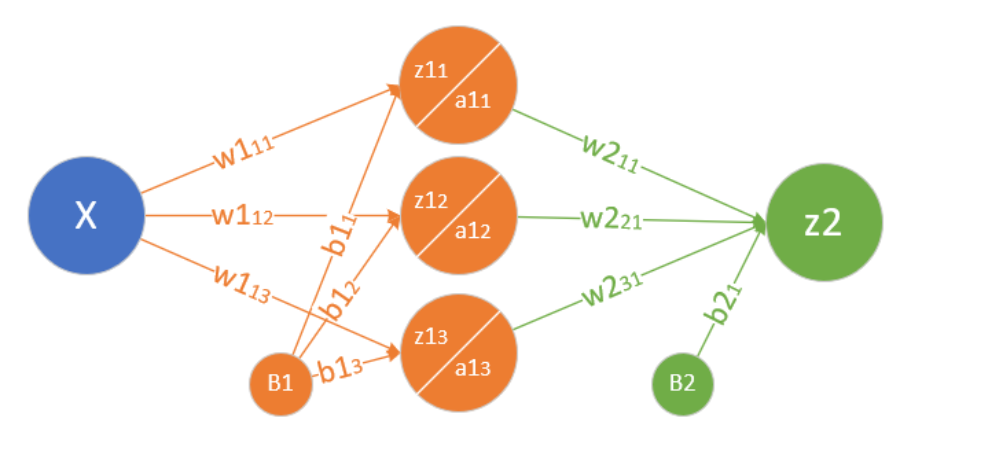

前向计算图：
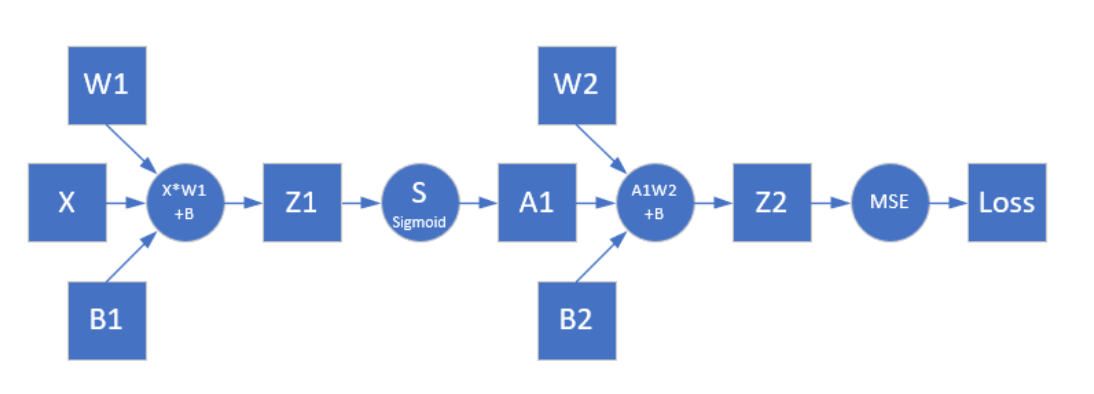

正向计算和反向传播路径图
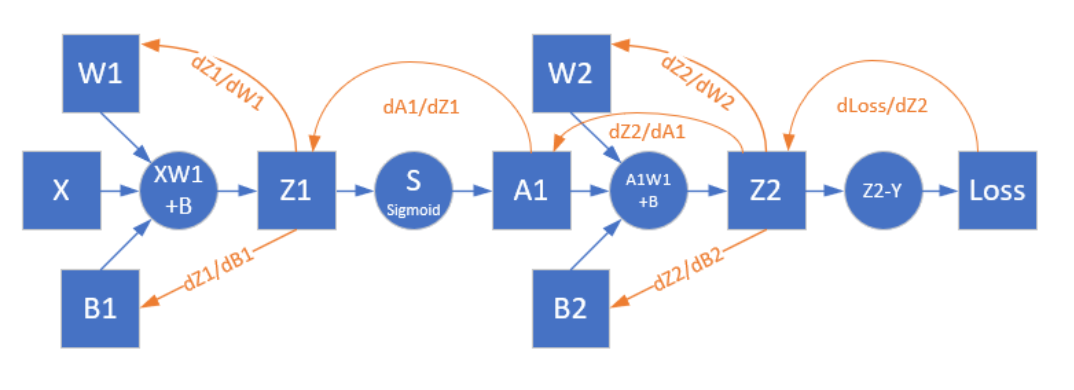

In [11]:
graph = Computer_Graph()
graph.connect()
x1 = Node()
x2 = Node()
x3 = Node()
x4 = Node()
y1 = Node.sin(x1 * x2) + Node.exp(x1 / x2) + x3**2 - x4**3
y2 = x3 * x4

# assign value for each input
x1.value = 1.234
x2.value = 2.345
x3.value = 3.456
x4.value = 4.567

# forward pass, compute the function value.
graph.compute_value()

# backward pass, compute the derivative
result = []
graph.compute_gradient(y1.ID)  
result.append(x1.derivative)
result.append(x2.derivative)
result.append(x3.derivative)
result.append(x4.derivative)

graph.compute_gradient(y2.ID)
result.append(x3.derivative)
result.append(x4.derivative)

In [12]:
table = PrettyTable()
table.field_names = ["Method", "dy1/dx1","dy1/dx2","dy1/dx3","dy1/dx4","dy2/dx3","dy2/dx4"]
row1=['this code']
row1.extend(result)
table.add_row(row1)
print(table)

+-----------+---------------------+---------------------+---------+------------+---------+---------+
|   Method  |       dy1/dx1       |       dy1/dx2       | dy1/dx3 |  dy1/dx4   | dy2/dx3 | dy2/dx4 |
+-----------+---------------------+---------------------+---------+------------+---------+---------+
| this code | -1.5515721246456353 | -1.5760978298000334 |  6.912  | -62.572467 |  4.567  |  3.456  |
+-----------+---------------------+---------------------+---------+------------+---------+---------+


In [13]:
# 数值微分
x1 = 1.234
x2 = 2.345
x3 = 3.456
x4 = 4.567

y = np.sin(x1 * x2) + np.exp(x1 / x2) + x3**2 - x4**3

delta = 0.0000001
x4 += delta
yy = np.sin(x1 * x2) + np.exp(x1 / x2) + x3**2 - x4**3
(yy - y) / delta

-62.57246866425703

# 损失函数

**在线性回归问题中，假设误差服从高斯分布的前提下，对模型参数的最大似然估计等价于最小二乘法（最小平方法）。**

In [15]:
1/63 * 0.217687

0.003455349206349206

# 线性关系

两个变量之间存在一次方函数关系，就称它们之间存在线性关系。

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

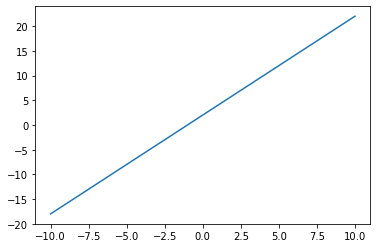

In [23]:
fig = plt.figure()
x = np.linspace(-10, 10, 101)
y = 2 * x + 2
plt.plot(x, y)

plt.show()

In [27]:
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


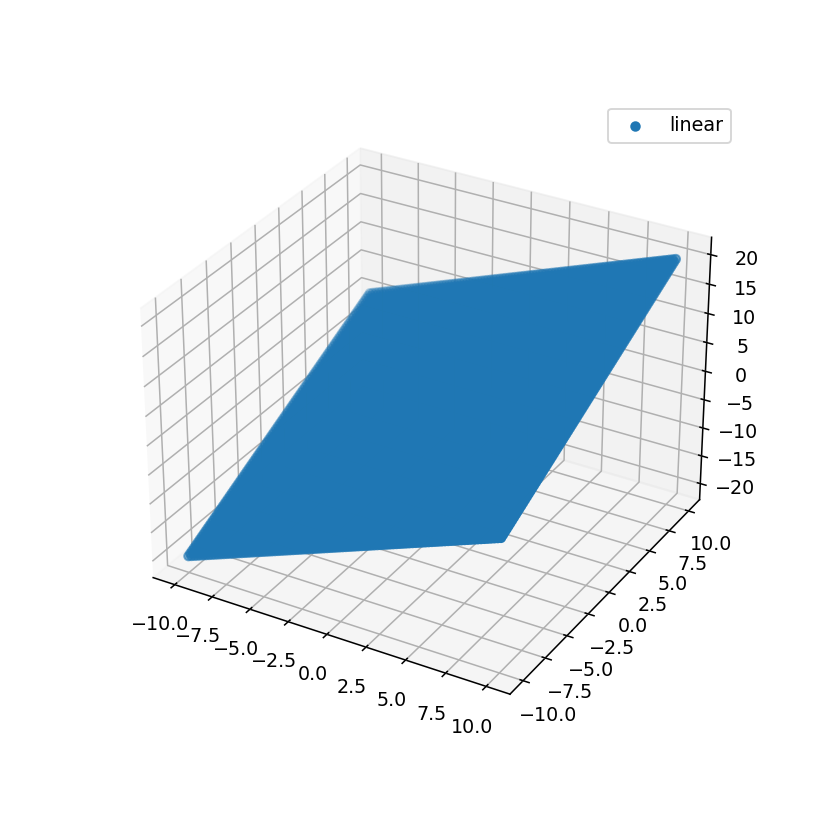

In [32]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

xx = []
yy = []
zz = []
for x in np.linspace(-10, 10, 101):
    for y in np.linspace(-10, 10, 101):
        z = x + y
        xx.append(x)
        yy.append(y)
        zz.append(z)
ax.scatter(xx, yy, zz, label='linear')
ax.legend()
 
plt.show()

# 非线性关系

什么叫模型？从常规概念上讲，是人们通过主观意识借助实体或者虚拟表现来构成对客观事物的描述，这种描述通常是有一定的逻辑或者数学含义的抽象表达方式。

# 集成学习

## Bagging

降低模型方差

随机森林

## Boosting

降低模型误差

1. adaboost
2. xgboost
3. lightboost

决策树：分段线性函数 分情况讨论



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles


In [3]:
weak_clf = DecisionTreeClassifier(max_depth=2)

In [4]:
clf = AdaBoostClassifier(base_estimator=weak_clf, algorithm="SAMME", n_estimators=300, learning_rate=0.8)

# K近邻算法

# 无监督学习算法

## 聚类

## EM算法

## PCA算法

那么如何选择这个方向（或者说基）才能尽量保留最多的原始信息呢？一种直观的看法是：希望投影后的投影值尽可能分散。

我们希望投影后投影值尽可能分散，而这种分散程度，可以用数学上的方差来表述。

于是上面的问题被形式化表述为：寻找一个一维基，使得所有数据变换为这个基上的坐标表示后，方差值最大。

协方差（高维）

从直观上说，让两个字段尽可能表示更多的原始信息，我们是不希望它们之间存在（线性）相关性的，因为相关性意味着两个字段不是完全独立，必然存在重复表示的信息。

数学上可以用两个字段的协方差表示其相关性。

根据上面对PCA的数学原理的解释，我们可以了解到一些PCA的能力和限制。PCA本质上是将方差最大的方向作为主要特征，并且在各个正交方向上将数据“离相关”，也就是让它们在不同正交方向上没有相关性

# 有监督学习算法

## LDA - Linear Discriminant Analysis 线性判别分析